In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path

In [2]:
DATA_DIR = Path("./dataset_parts")
PARQUET_FILES = sorted(list(DATA_DIR.glob("*.parquet")))
print(f"Found {len(PARQUET_FILES)} parquet files.")

Found 100 parquet files.


In [3]:
df = pd.concat([pd.read_parquet(f) for f in PARQUET_FILES], ignore_index=True)
df.describe()

,game_result,game_phase,game_stage,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.555300,0.660675,0.456732,52.542159,58.525341,2.840664
std,0.403455,0.294600,0.580460,821.499279,976.485565,1.195081
min,0.000000,0.000000,0.000000,-10000.000000,-10000.000000,0.000000
25%,0.000000,0.416667,0.000000,-29.000000,-26.000000,2.000000
50%,0.500000,0.750000,0.000000,22.000000,21.000000,3.000000
75%,1.000000,0.916667,1.000000,110.000000,109.000000,3.000000
max,1.000000,1.000000,2.000000,10000.000000,10000.000000,6.000000


In [4]:
df.head()

,fen,game_result,game_phase,game_stage,is_check,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
0,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,1.0,1.0,0,False,52.0,42.0,3
1,rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBN...,1.0,1.0,0,False,45.0,40.0,3
2,rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQK...,1.0,1.0,0,False,34.0,33.0,3
3,r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNB...,1.0,1.0,0,False,37.0,31.0,3
4,r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/R...,1.0,1.0,0,False,25.0,24.0,3


In [5]:
print("Statistics for Stockfish Depth 20 Scores:")
df["stockfish_score_depth_20"].describe()

Statistics for Stockfish Depth 20 Scores:


count    1000000.000000
mean          58.525341
std          976.485565
min       -10000.000000
25%          -26.000000
50%           21.000000
75%          109.000000
max        10000.000000
Name: stockfish_score_depth_20, dtype: float64

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
fen                         0
game_result                 0
game_phase                  0
game_stage                  0
is_check                    0
stockfish_score_depth_10    0
stockfish_score_depth_20    0
stockfish_label_depth_20    0
dtype: int64


In [7]:
df_no_mate = df[df["stockfish_score_depth_20"].between(-5000,5000)]
df_no_mate.describe()

,game_result,game_phase,game_stage,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
count,990920.000000,990920.000000,990920.000000,990920.000000,990920.000000,990920.000000
mean,0.554627,0.662125,0.453785,35.040982,36.470230,2.845992
std,0.402629,0.294624,0.579145,239.827851,252.245318,1.166507
min,0.000000,0.000000,0.000000,-9995.000000,-4987.000000,0.000000
25%,0.000000,0.416667,0.000000,-29.000000,-25.000000,2.000000
50%,0.500000,0.750000,0.000000,21.000000,20.000000,3.000000
75%,1.000000,0.916667,1.000000,108.000000,107.000000,3.000000
max,1.000000,1.000000,2.000000,9983.000000,4944.000000,6.000000


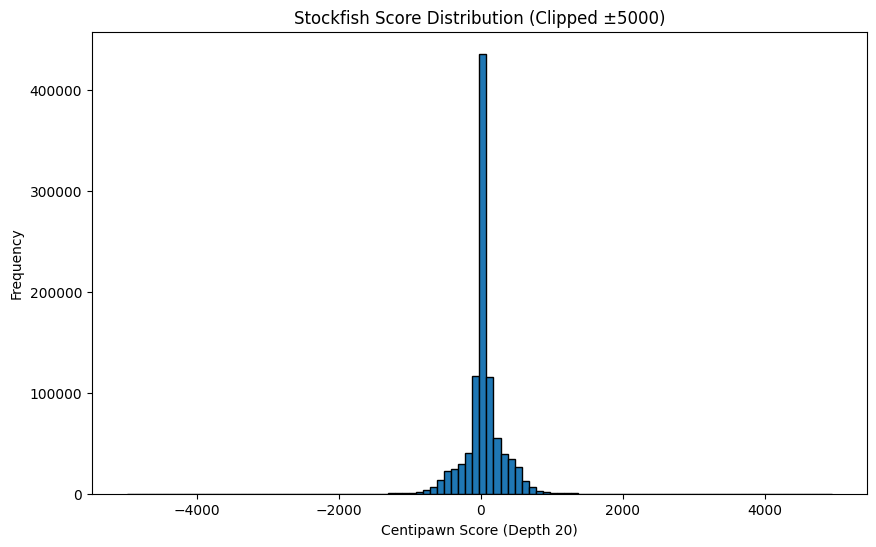

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df_no_mate["stockfish_score_depth_20"], bins=100, edgecolor='black')
plt.xlabel("Centipawn Score (Depth 20)")
plt.ylabel("Frequency")
plt.title("Stockfish Score Distribution (Clipped ±5000)")
plt.show()

In [9]:
lower_bound = df["stockfish_score_depth_20"].quantile(0.01)
upper_bound = df["stockfish_score_depth_20"].quantile(0.99)
print(f"Filtering data between {lower_bound:.1f} and {upper_bound:.1f} cp")
df_center = df[df["stockfish_score_depth_20"].between(lower_bound, upper_bound)]
df_center.describe()


Filtering data between -731.0 and 852.0 cp


,game_result,game_phase,game_stage,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
count,980047.000000,980047.000000,980047.000000,980047.000000,980047.000000,980047.00000
mean,0.556251,0.665340,0.447028,36.831996,38.353161,2.83749
std,0.401297,0.293405,0.574545,214.808753,225.787727,1.12852
min,0.000000,0.000000,0.000000,-9981.000000,-731.000000,0.00000
25%,0.000000,0.416667,0.000000,-27.000000,-24.000000,2.00000
50%,0.500000,0.750000,0.000000,22.000000,21.000000,3.00000
75%,1.000000,0.916667,1.000000,107.000000,105.000000,3.00000
max,1.000000,1.000000,2.000000,9976.000000,852.000000,6.00000


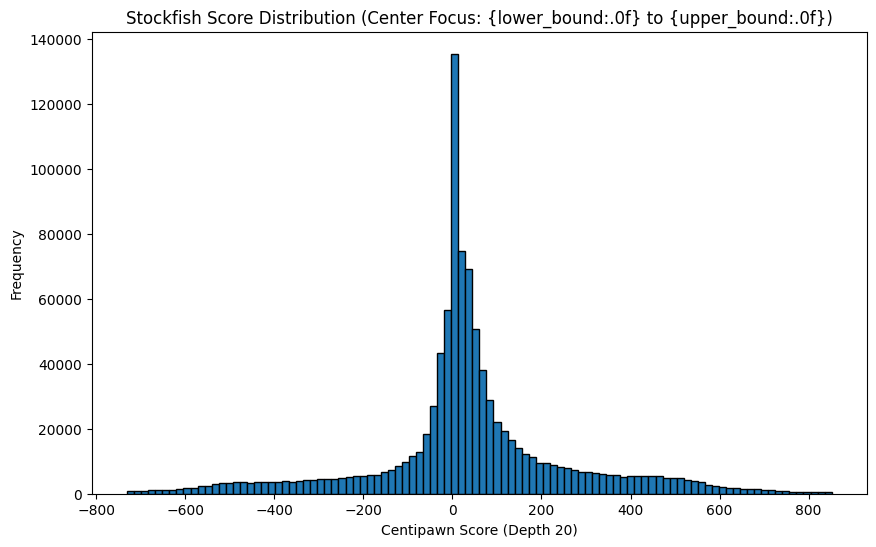

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df_center["stockfish_score_depth_20"], bins=100, edgecolor='black')
plt.xlabel("Centipawn Score (Depth 20)")
plt.ylabel("Frequency")
plt.title("Stockfish Score Distribution (Center Focus: {lower_bound:.0f} to {upper_bound:.0f})")
plt.show()

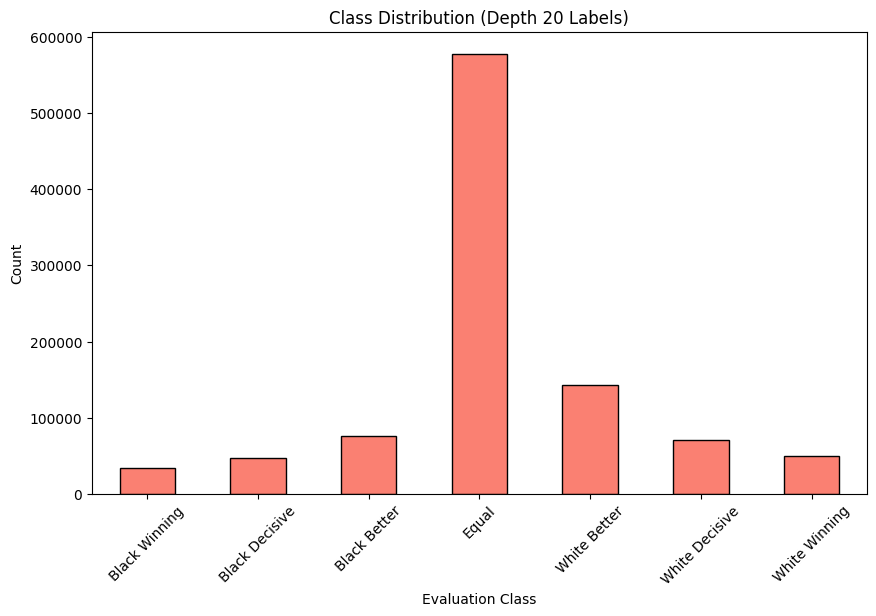

In [11]:
label_map = {
    0: "White Winning",
    1: "White Decisive",
    2: "White Better",
    3: "Equal",
    4: "Black Better",
    5: "Black Decisive",
    6: "Black Winning"
}

counts = df["stockfish_label_depth_20"].value_counts().sort_index()
counts = counts.iloc[::-1]
plt.figure(figsize=(10, 6))
counts.plot(kind="bar", color='salmon', edgecolor='black')
plt.xticks(ticks=range(len(counts)), 
           labels=[label_map.get(i, i) for i in counts.index], 
           rotation=45)

plt.xlabel("Evaluation Class")
plt.ylabel("Count")
plt.title("Class Distribution (Depth 20 Labels)")
plt.show()

In [15]:
exact_counts = counts.rename(index=label_map)
print(exact_counts)

stockfish_label_depth_20
Black Winning      34548
Black Decisive     47634
Black Better       76145
Equal             578076
White Better      142804
White Decisive     70790
White Winning      50003
Name: count, dtype: int64


Min pieces on board: 2
Max pieces on board: 32
Avg pieces on board: 21.89


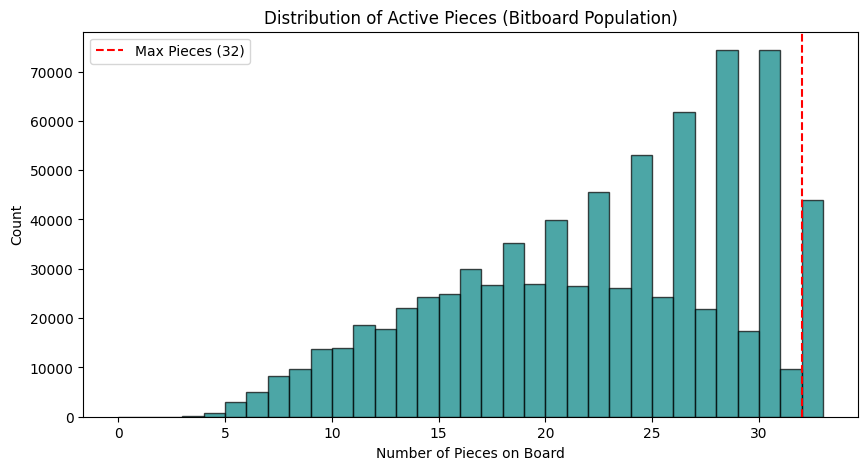

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

file_path = Path("./dataset_processed_clean_split/chess_bitboard_train.npz")

with np.load(file_path) as data:
    X_train = data['X']

pieces_per_position = np.sum(X_train, axis=1)

print(f"Min pieces on board: {pieces_per_position.min()}")
print(f"Max pieces on board: {pieces_per_position.max()}")
print(f"Avg pieces on board: {pieces_per_position.mean():.2f}")

plt.figure(figsize=(10, 5))
plt.hist(pieces_per_position, bins=range(0, 34), color='teal', edgecolor='black', alpha=0.7)
plt.title("Distribution of Active Pieces (Bitboard Population)")
plt.xlabel("Number of Pieces on Board")
plt.ylabel("Count")
plt.axvline(32, color='red', linestyle='--', label='Max Pieces (32)')
plt.legend()
plt.show()

In [23]:
files = [
    Path("./dataset_processed_clean_split/chess_bitboard_train.npz"),
    Path("./dataset_processed_clean_split/chess_bitboard_val.npz"),
    Path("./dataset_processed_clean_split/chess_bitboard_test.npz")
]

total_even = 0
total_odd = 0
total_positions = 0

print(f"{'Dataset':<10} | {'Total':<10} | {'Even':<10} | {'Odd':<10} | {'Even %':<8} | {'Odd %':<8}")
print("-" * 75)

for file_path in files:
    try:
        split_name = file_path.stem.split('_')[-1].capitalize()  # e.g., "Train", "Val"
        
        with np.load(file_path) as data:
            # Load data (assuming key is 'X' based on your previous code)
            X = data['X']
            
            # Calculate pieces per position
            pieces_per_position = np.sum(X, axis=1)
            
            # Count
            count_even = np.sum(pieces_per_position % 2 == 0)
            count_odd = np.sum(pieces_per_position % 2 != 0)
            total = len(pieces_per_position)
            
            # Add to grand totals
            total_even += count_even
            total_odd += count_odd
            total_positions += total
            
            # Print row for this file
            print(f"{split_name:<10} | {total:<10,} | {count_even:<10,} | {count_odd:<10,} | {count_even/total:.1%}   | {count_odd/total:.1%}")

    except FileNotFoundError:
        print(f"Error: Could not find {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print("-" * 75)
# Print Grand Total
print(f"{'ALL':<10} | {total_positions:<10,} | {total_even:<10,} | {total_odd:<10,} | {total_even/total_positions:.1%}   | {total_odd/total_positions:.1%}")

Dataset    | Total      | Even       | Odd        | Even %   | Odd %   
---------------------------------------------------------------------------
Train      | 800,000    | 529,994    | 270,006    | 66.2%   | 33.8%
Val        | 100,000    | 66,354     | 33,646     | 66.4%   | 33.6%
Test       | 100,000    | 65,803     | 34,197     | 65.8%   | 34.2%
---------------------------------------------------------------------------
ALL        | 1,000,000  | 662,151    | 337,849    | 66.2%   | 33.8%
